In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Walmart DataSet.csv',parse_dates=['Date'],index_col=['Date'])

In [7]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667


In [8]:
df.shape

(6435, 7)

In [9]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [10]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:

# There are about 45 different stores in this dataset. Lets select the any store id from 1-45

a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())


Enter the store id:5


In [12]:
sales

,Weekly_Sales
Date,
2010-01-10,283178.12
2010-02-04,331406.00
2010-02-07,305993.27
2010-02-19,303447.57
2010-02-26,270281.63
...,...
2012-10-08,306759.70
2012-10-19,313358.15
2012-10-26,319550.77


In [13]:
sales.size    # now the date and weekly sales details of store (a) is grouped and stored in sales dataframe

143

<AxesSubplot:xlabel='Date'>

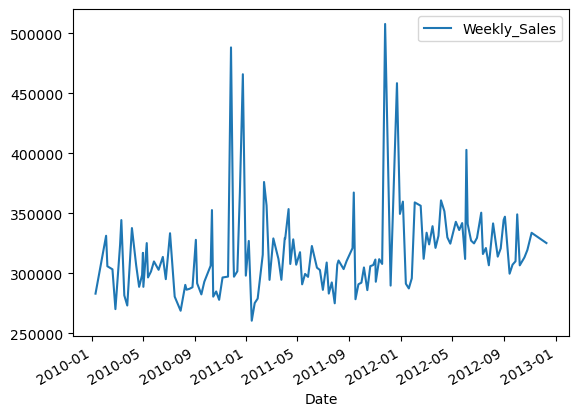

In [14]:
sales.plot()

In [11]:
## Resampling data 

ts=sales['Weekly_Sales'].resample('MS').sum()

In [12]:
ts

Date
2010-01-01     1645892.97
2010-02-01     8104753.38
2010-03-01     7857945.61
2010-04-01     7377864.14
2010-05-01    11572638.96
2010-06-01     5555044.64
2010-07-01     7413824.69
2010-08-01     7445945.10
2010-09-01     7182655.27
2010-10-01     9317713.31
2010-11-01     6716645.22
2010-12-01    14281278.92
2011-01-01     8683231.75
2011-02-01     7901615.79
2011-03-01     5492744.05
2011-04-01    11490732.39
2011-05-01     7063203.81
2011-06-01     5371117.88
2011-07-01     8797789.84
2011-08-01     7253677.86
2011-09-01     9064402.86
2011-10-01     6962537.65
2011-11-01    10944734.79
2011-12-01     9891106.07
2012-01-01     6787003.15
2012-02-01     6198496.52
2012-03-01     9390875.87
2012-04-01     7286206.02
2012-05-01     5385063.21
2012-06-01    10927164.70
2012-07-01     7161425.88
2012-08-01     7083558.50
2012-09-01     6924372.07
2012-10-01     7578216.61
2012-11-01     1792345.30
2012-12-01     1713889.11
Freq: MS, Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

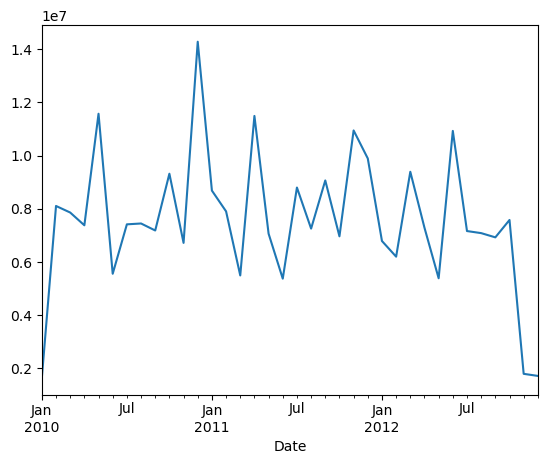

In [13]:
ts.plot()

In [14]:
## Stationary check

from statsmodels.tsa.seasonal import seasonal_decompose

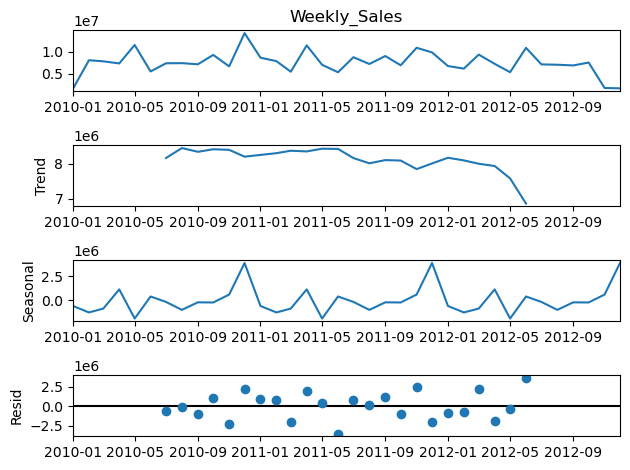

In [15]:
dc=seasonal_decompose(ts,model='additive')
fig=dc.plot()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adftest=adfuller(ts)
print('P-Value of adfuller test is :',adftest[1])

P-Value of adfuller test is : 0.8765084271862091


In [18]:
## Train-Test Split

len(ts)

36

In [19]:
train=ts[:26]
test=ts[26:]

In [20]:
## ARIMA MODEL BUILDING

## calculate the value of p,d,q


In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
!pip install pmdarima


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from pmdarima import auto_arima

In [24]:
order = auto_arima(train,start_p=0,seasonal=True,d=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=824.342, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=828.828, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=824.953, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=826.914, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=822.524, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=822.438, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=824.359, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=823.010, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.896 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -409.219
Date:                Tue, 31 Oct 2023   AIC                            822.438
Time:                        11:24:16   BIC                            824.876
Sample:                    01-01-2010   HQIC                           823.114
                         - 02-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7669      0.150     -5.113      0.000      -1.061      -0.473
sigma2      5.998e+12   7.72e-15   7.77e+26      0.000       6e+12       6e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.94   Prob(JB):                         0.38
Heteroskedasticity (H):               0.24   Skew:                             0.63
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.29e+43. Standard errors may be unstable.
"""

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

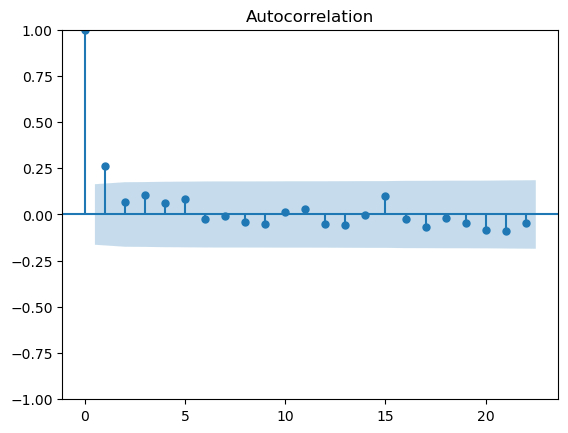

In [60]:
acf = plot_acf(sales["Weekly_Sales"])

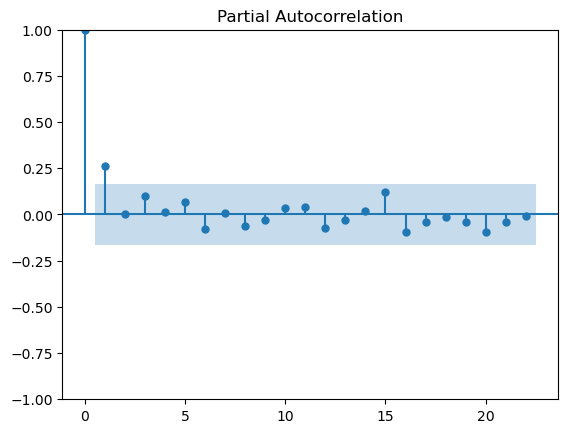

In [61]:
pacf = plot_pacf(sales["Weekly_Sales"])

In [25]:
import itertools
from sklearn.metrics import mean_squared_error

In [26]:
p=range(0,5)
q=range(0,5)
d=range(0,2)

In [27]:
pdq_combination=list(itertools.product(p,d,q))

In [28]:
len(pdq_combination)

50

In [29]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [30]:
rmse=[]
order1=[]

In [31]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\

In [32]:
results=pd.DataFrame(index=order1,data=rmse,columns=['MSE'])

In [34]:
results.to_csv('meansquarederror3.csv')

In [35]:
# ARIMA MODEL

from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train,order=(4,1,4)).fit()


C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
# predict test dataset

pred=model.predict(start=len(train),end=(len(ts)-1))

In [37]:
# Model Evaluation

from sklearn.metrics import mean_squared_error

In [38]:
error=np.sqrt(mean_squared_error(test,pred))
error

2721512.803847932

In [39]:
test.mean(),np.sqrt(test.var())

(6524311.727, 2925021.9673039787)

<AxesSubplot:xlabel='Date'>

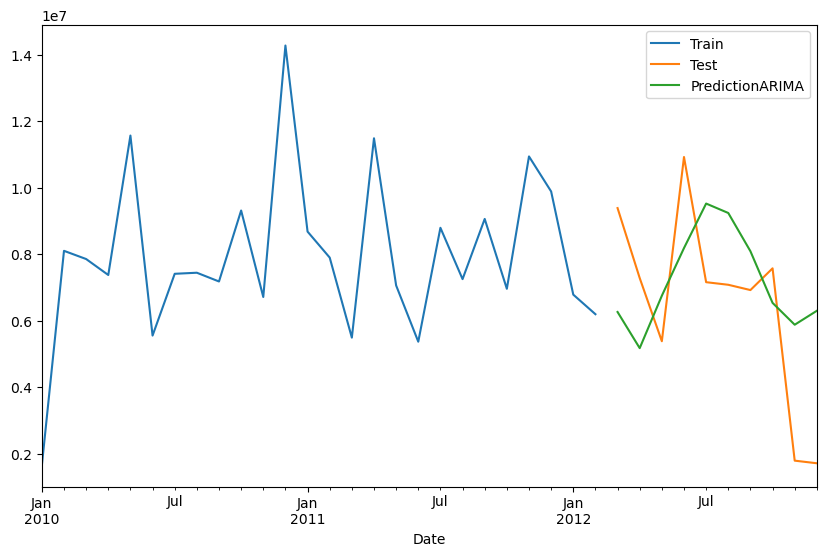

In [40]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='PredictionARIMA')

In [41]:
##predict future data

final_model=ARIMA(ts,order=(4,1,4)).fit()  # build on full dataset

C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
prediction=final_model.predict(len(ts),len(ts)+12)

In [43]:
prediction

2013-01-01    5.502713e+06
2013-02-01    4.339873e+06
2013-03-01    5.553772e+06
2013-04-01    6.386455e+06
2013-05-01    7.555425e+06
2013-06-01    6.365515e+06
2013-07-01    6.627479e+06
2013-08-01    6.662115e+06
2013-09-01    7.353987e+06
2013-10-01    6.701028e+06
2013-11-01    6.835147e+06
2013-12-01    6.704463e+06
2014-01-01    7.141318e+06
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

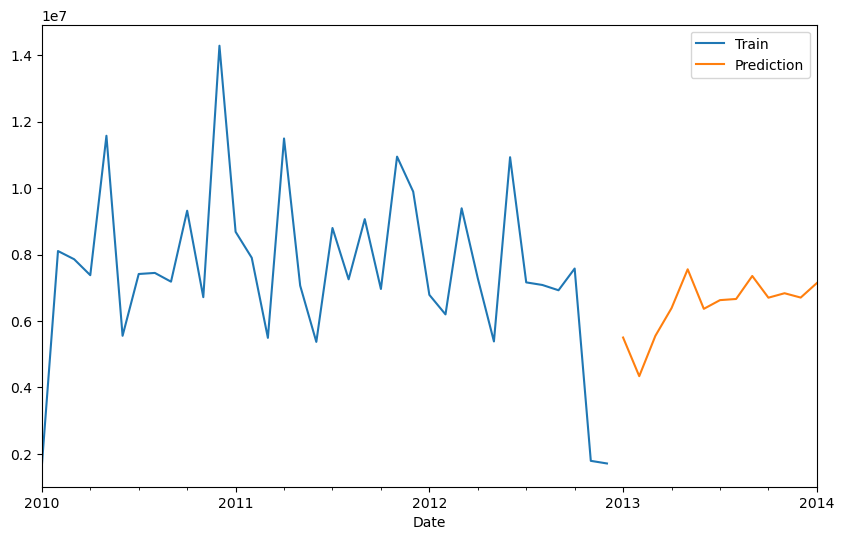

In [44]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')

In [65]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
model_SARIMA=SARIMAX(train,order=(4,1,4),seasonal_order=(0,1,0,12))

In [67]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                   26
Model:             SARIMAX(4, 1, 4)x(0, 1, [], 12)   Log Likelihood                -216.703
Date:                             Tue, 31 Oct 2023   AIC                            451.406
Time:                                     12:02:45   BIC                            456.490
Sample:                                 01-01-2010   HQIC                           450.361
                                      - 02-01-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1550      1.552     -0.100      0.920      -3.196       2.886
ar.L2         -0.2874      0.772     -0.372      0.710      -1.801       1.226
ar.L3          0.5133      1.624      0.316      0.752      -2.669       3.695
ar.L4          0.6004      0.960      0.626      0.532      -1.281       2.482
ma.L1         -0.3770      2.115     -0.178      0.859      -4.523       3.769
ma.L2          0.3757      2.529      0.149      0.882      -4.581       5.333
ma.L3         -0.7910      1.754     -0.451      0.652      -4.228       2.646
ma.L4         -0.1807      1.752     -0.103      0.918      -3.614       3.253
sigma2      2.595e+13   3.25e-13   7.98e+25      0.000    2.59e+13    2.59e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.35   Prob(JB):                         0.84
Heteroskedasticity (H):               0.13   Skew:                            -0.12
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+42. Standard errors may be unstable.
"""

In [69]:
pred_sarima=model_SARIMA_fit.predict(start=len(train),end=(len(ts)-1))

In [70]:
error1=np.sqrt(mean_squared_error(test,pred_sarima))
error1

4091966.0647484297

In [71]:
test.mean(),np.sqrt(test.var())

(6524311.727, 2925021.9673039787)

<AxesSubplot:xlabel='Date'>

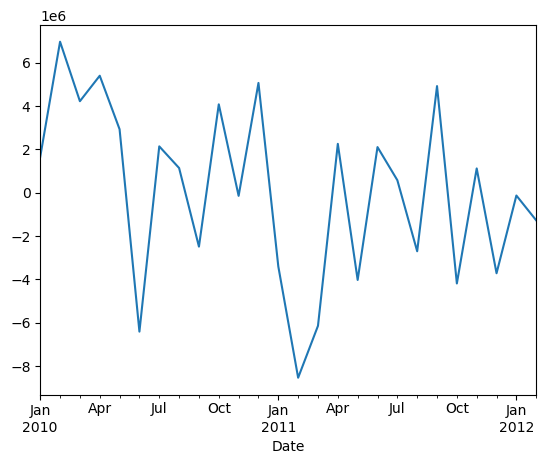

In [72]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

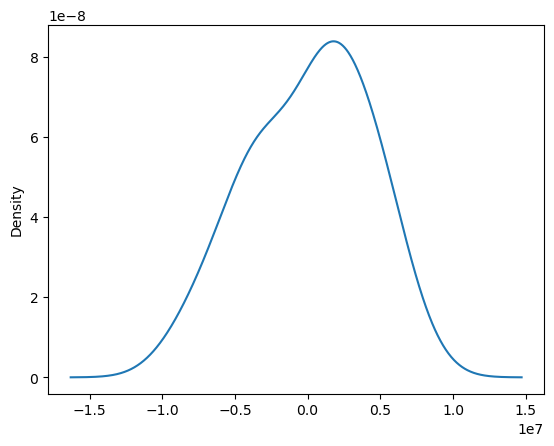

In [73]:
model_SARIMA_fit.resid.plot(kind='kde')

<AxesSubplot:xlabel='Date'>

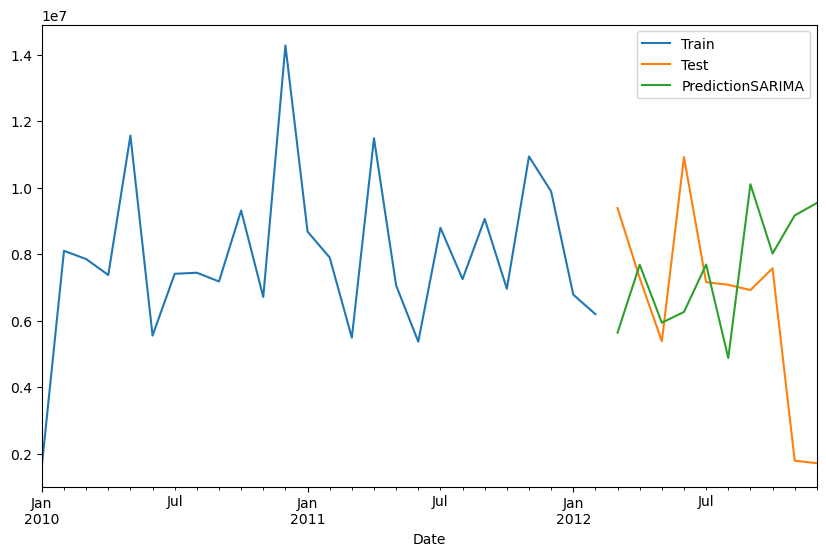

In [74]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred_sarima.plot(legend=True,label='PredictionSARIMA')

In [75]:
##predict future data

final_model1=SARIMAX(ts,order=(4,1,4)).fit()  # build on full dataset

C:\Users\Senthil Kumar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
prediction=final_model1.predict(len(ts),len(ts)+12)

In [77]:
prediction

2013-01-01    5.502713e+06
2013-02-01    4.339873e+06
2013-03-01    5.553772e+06
2013-04-01    6.386455e+06
2013-05-01    7.555425e+06
2013-06-01    6.365515e+06
2013-07-01    6.627479e+06
2013-08-01    6.662115e+06
2013-09-01    7.353987e+06
2013-10-01    6.701028e+06
2013-11-01    6.835147e+06
2013-12-01    6.704463e+06
2014-01-01    7.141318e+06
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

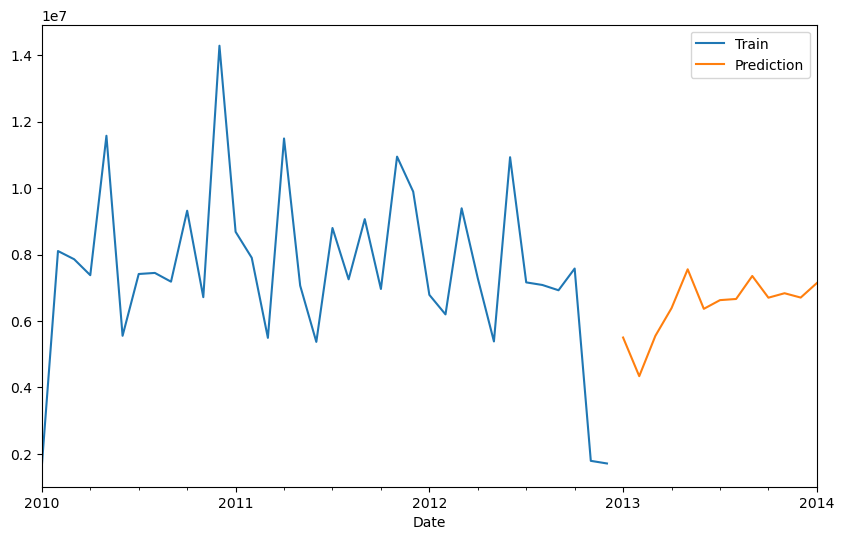

In [78]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')

In [62]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
pip install --upgrade pip

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install prophet

   ---------------------------------------- 13.3/13.3 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 93.0/93.0 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 801.0/801.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from prophet import Prophet

In [15]:
sales.head()

,Weekly_Sales
Date,
2010-01-10,283178.12
2010-02-04,331406.00
2010-02-07,305993.27
2010-02-19,303447.57
2010-02-26,270281.63


In [17]:
sales.columns


Index(['Weekly_Sales'], dtype='object')

In [18]:
sales.reset_index(inplace=True)

In [20]:
sales['Date'] = pd.to_datetime(sales['Date'])


In [24]:
sales

,Date,Weekly_Sales
0,2010-01-10,283178.12
1,2010-02-04,331406.00
2,2010-02-07,305993.27
3,2010-02-19,303447.57
4,2010-02-26,270281.63
...,...,...
138,2012-10-08,306759.70
139,2012-10-19,313358.15
140,2012-10-26,319550.77
141,2012-11-05,333870.52


In [25]:
sales.columns=['ds','y']
sales.head()

,ds,y
0,2010-01-10,283178.12
1,2010-02-04,331406.00
2,2010-02-07,305993.27
3,2010-02-19,303447.57
4,2010-02-26,270281.63


In [26]:
model_fb=Prophet()
model_fb.fit(sales)

13:18:45 - cmdstanpy - INFO - Chain [1] start processing
13:18:46 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = model_fb.make_future_dataframe(periods = 100)

In [39]:
future

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
238,2013-03-16
239,2013-03-17
240,2013-03-18
241,2013-03-19


In [40]:
forecast = model_fb.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-10,300714.933945,249122.091232,316782.839052,300714.933945,300714.933945,-17082.659823,-17082.659823,-17082.659823,3266.106004,3266.106004,3266.106004,-20348.765827,-20348.765827,-20348.765827,0.0,0.0,0.0,283632.274122
1,2010-02-04,301831.787123,282496.972494,352297.437421,301831.787123,301831.787123,15693.746673,15693.746673,15693.746673,-8612.959229,-8612.959229,-8612.959229,24306.705902,24306.705902,24306.705902,0.0,0.0,0.0,317525.533796
2,2010-02-07,301965.809504,305322.468235,372089.285295,301965.809504,301965.809504,36176.852196,36176.852196,36176.852196,3266.106004,3266.106004,3266.106004,32910.746192,32910.746192,32910.746192,0.0,0.0,0.0,338142.661700
3,2010-02-19,302501.899030,274125.108842,344487.593138,302501.899030,302501.899030,5011.859132,5011.859132,5011.859132,-8008.644237,-8008.644237,-8008.644237,13020.503370,13020.503370,13020.503370,0.0,0.0,0.0,307513.758162
4,2010-02-26,302814.617920,258038.682076,325001.700902,302814.617920,302814.617920,-11272.149690,-11272.149690,-11272.149690,-8008.644237,-8008.644237,-8008.644237,-3263.505453,-3263.505453,-3263.505453,0.0,0.0,0.0,291542.468230


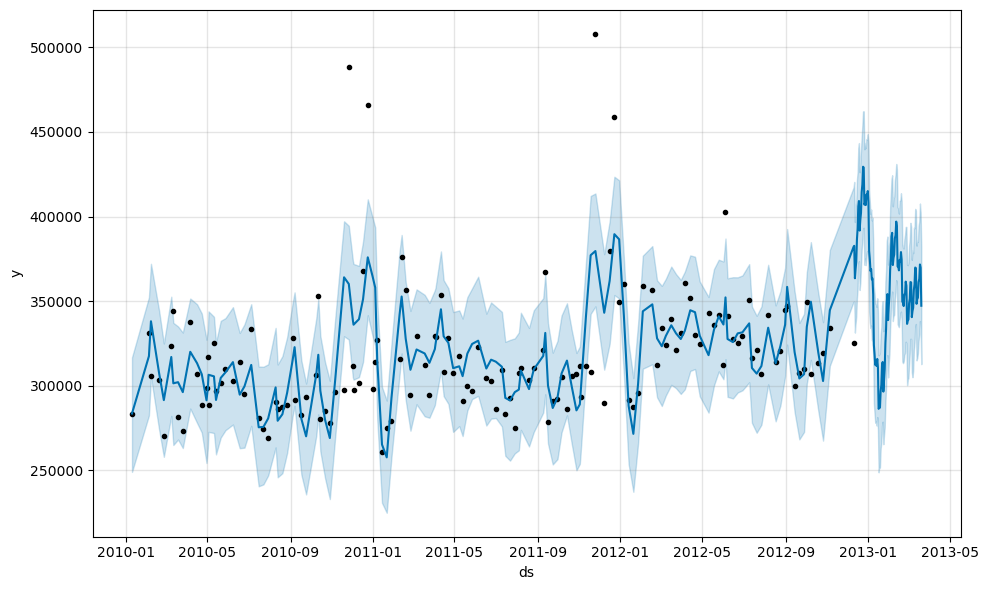

In [41]:
model_fb.plot(forecast);

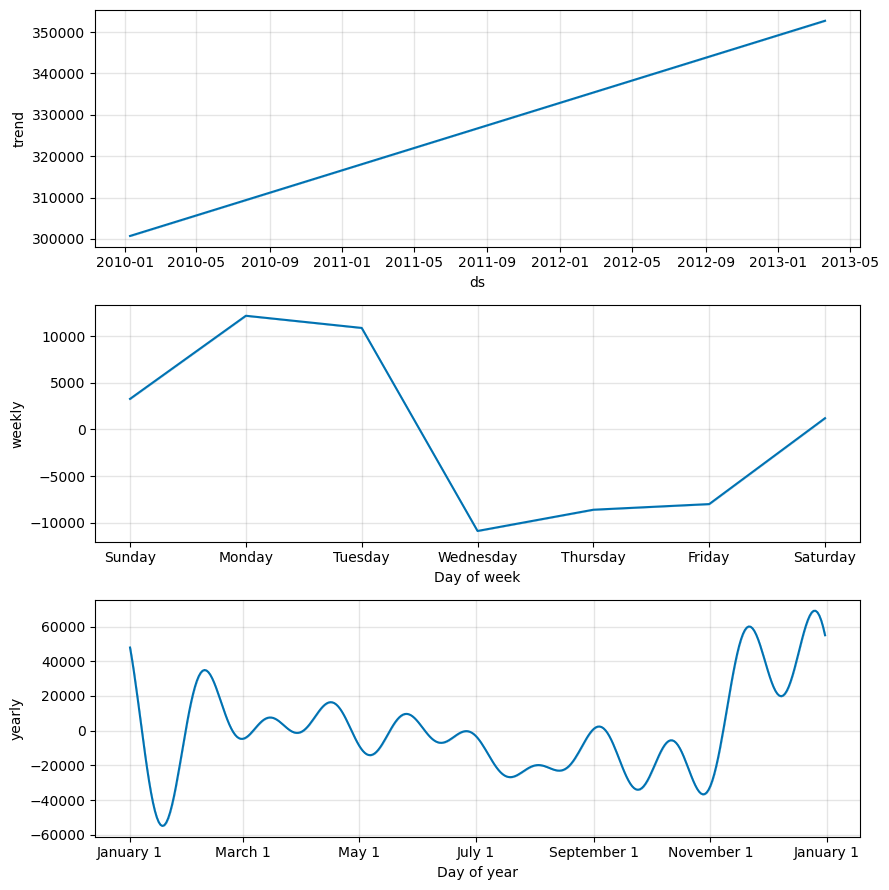

In [42]:
## visualize each components

model_fb.plot_components(forecast);